In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-ostrouhov/shared/homeworks/python_ds_miniprojects/4/data/'

In [3]:
users = pd.DataFrame()
for i in os.listdir(data):
    for a in os.listdir(data + i):
        for b in os.listdir(data + i + '/' + a):
            df2 = pd.read_csv(data + i + '/' + a + '/' + b)
            c = i.split('/')[-1]
            df2['date'] = c
            d = a.split('/')[-1]
            df2['name'] = d
            users = pd.concat([users, df2])

In [4]:
users.reset_index()

,index,Unnamed: 0,product_id,quantity,date,name
0,0,0,27,4,2020-12-05,Petr_Ivanov
1,1,1,89,1,2020-12-05,Petr_Ivanov
2,2,2,33,2,2020-12-05,Petr_Ivanov
3,3,3,8,3,2020-12-05,Petr_Ivanov
4,4,4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...,...,...
156,0,0,18,4,2020-12-07,Petr_Fedorov
157,1,1,94,4,2020-12-07,Petr_Fedorov
158,0,0,95,2,2020-12-07,Vasiliy_Ivanov
159,1,1,83,3,2020-12-07,Vasiliy_Ivanov


In [5]:
users['date'] = pd.to_datetime(users['date'])

In [6]:
users.dtypes

Unnamed: 0             int64
product_id             int64
quantity               int64
date          datetime64[ns]
name                  object
dtype: object

In [7]:
users.quantity.sum()

480

In [8]:
sum_quantity = users.groupby('name', as_index=False)  \
                .agg({'quantity': 'sum'})  \
                .sort_values('quantity', ascending=False)

In [9]:
product_id_quantity_sum = users.groupby('product_id', as_index=False)  \
                .agg({'quantity': 'sum'})  \
                .sort_values('quantity', ascending=False)  \
                .head(10)

In [10]:
product_id_quantity_sum

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


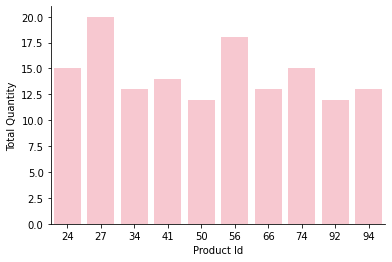

In [11]:
ax = sns.barplot(x='product_id', y='quantity', data=product_id_quantity_sum, color='pink', alpha=1)
ax.set(xlabel='Product Id', ylabel='Total Quantity')
sns.despine()  # убрать часть рамки графика
plt.show()

In [12]:
sales_for_day = users.groupby('date', as_index=False)  \
                .agg({'quantity': 'sum'})  \
                .sort_values('date', ascending=True)  \

In [13]:
sales_for_day['date'] = sales_for_day.date.dt.strftime('%B %d')

In [14]:
sales_for_day

,date,quantity
0,December 03,60
1,December 04,113
2,December 05,61
3,December 06,15
4,December 07,94
5,December 08,68
6,December 09,69


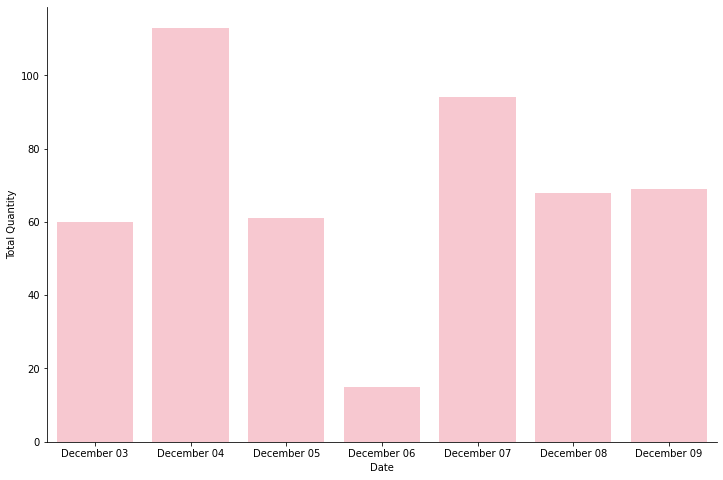

In [15]:
plt.figure(figsize=(12, 8))
ay = sns.barplot(x='date', y='quantity', data=sales_for_day, color='pink', alpha=1)
ay.set(xlabel='Date', ylabel='Total Quantity')
sns.despine()  # убрать часть рамки графика
plt.show()

In [16]:
drop_dupl_users = users.drop_duplicates(subset=['date', 'name', 'product_id'])

In [17]:
dupl_pushase = drop_dupl_users.groupby(['name', 'product_id'], as_index=False).agg({'date': 'count'})

In [18]:
dupl_pushase.query('date > 1')

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
